In [88]:
# librairy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier

%matplotlib inline

In [8]:
os.getcwd()
os.chdir('C:\\Users\\Simplonco\\Documents\\jupyter-notebook\\datasets')
# chargement du dataset
dataset=pd.read_table('heart.txt')

dataset

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140,268,A,C,160,non,36,3,C,presence
266,62,masculin,130,231,A,A,146,non,18,2,D,absence
267,64,masculin,110,211,A,C,144,oui,18,2,A,absence
268,63,feminin,150,407,A,C,154,non,40,2,D,presence


## Informations sur l’ensemble de données :

#### MOTIVATION:
Afin de classer avec précision les patients atteints de maladies cardiaques présentant la présence ou l’absence de l’état pathologique, un cadre de modélisation prédictive est impliqué.

je présente une approche d’apprentissage automatique supervisé qui est développée afin de regrouper les patients avec et sans la maladie. L’ensemble de données se rapporte à celui de « Maladie cardiaque de Cleveland traitée » 

Cette base de données contient 12 attributs. Le champ « coeur » fait référence à la présence d’une maladie cardiaque chez le patient. Il s’agit d’une chaine de caractère évalué entre 0(abscence) et 1(presence).

### WORKFLOW &QUESTIONS D’INTÉRÊT:
L’analyse exploratoire des données est d’abord effectuée sur l’ensemble de données choisi mentionné ci-dessus, suivie du prétraitement et des transformations de données nécessaires. L’ensemble de données final est étudié à l’aide de divers algorithmes supervisés. À l’aide de la validation croisée K-Fold, divers algorithmes ont été évalués pour mieux prédire la précision du modèle final. Dans l’ensemble, l’objectif de ce billet de blog est de démontrer l’approche de bout en bout pour un modèle de classification supervisé.

### MÉTHODOLOGIE:
L’ensemble de données se composait de 270 enregistrements de patients présentant 12 attributs. Les attributs comprennent les variables suivantes:
- (1) Âge (âge en années)
- (2) Sexe (1 = masculin ; 0 = feminin)
- (3) Pression artérielle au repos (en mm Hg à l’admission)
- (4) Cholestérol sérique (en mg/dl)
- (5) Sucre dans le sang à jeun (>120 mg/dl) (A=vrai B=faux)
- (6) Résultats de l’ECG au repos (A = Normal, B = anomalie ST-T, C = Hypertrophie du ventricule gauche)
- (7) Fréquence cardiaque maximale 
- (8) Angine induite par l’exercice (1=oui 0=non)
- (9) Dépression ST 
- (10) Pente du segment ST de pic d’exercice  (1 = Pente ascendante, 2 = Plate, 3 = Pente descendante)
- (11) le nombre de vaisseaux principaux colorés par flouroscopie (0 = A, 1 = B, 2 = C, 3 = D)
- (12) Diagnostic de la maladie. (variable cible, 1=oui 0=non)

Nous avous donc 11 varibles indépendantes et 1 variable cible

Le tableau suivant résume la signification de chaque variable.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         270 non-null    int64 
 1   sexe        270 non-null    object
 2   pression    270 non-null    int64 
 3   cholester   270 non-null    int64 
 4   sucre       270 non-null    object
 5   electro     270 non-null    object
 6   taux_max    270 non-null    int64 
 7   angine      270 non-null    object
 8   depression  270 non-null    int64 
 9   pic         270 non-null    int64 
 10  vaisseau    270 non-null    object
 11  coeur       270 non-null    object
dtypes: int64(6), object(6)
memory usage: 25.4+ KB


In [6]:
dataset.describe()

,age,pression,cholester,taux_max,depression,pic
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,10.500000,1.585185
std,9.109067,17.861608,51.686237,23.165717,11.452098,0.614390
min,29.000000,94.000000,126.000000,71.000000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,8.000000,2.000000
75%,61.000000,140.000000,280.000000,166.000000,16.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,62.000000,3.000000


In [17]:
dataset.describe(include=object)

,sexe,sucre,electro,angine,vaisseau,coeur
count,270,270,270,270,270,270
unique,2,2,3,2,4,2
top,masculin,A,C,non,A,absence
freq,183,230,137,181,160,150


## STATISTIQUES DESCRIPTIVES: 
Les statistiques de chaque attribut d’entité sont étudiées et les figures ci-dessous illustrent la distribution pour chacun d’eux.

In [9]:
dataset.columns

Index(['age', 'sexe', 'pression', 'cholester', 'sucre', 'electro', 'taux_max',
       'angine', 'depression', 'pic', 'vaisseau', 'coeur'],
      dtype='object')

### VARIABLES QUALITATIVES
## Diagramme en secteurs

quali_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        quali_columns.append(col)
        df[col].value_counts().plot.pie(autopct="%.1f%%")
        plt.show()

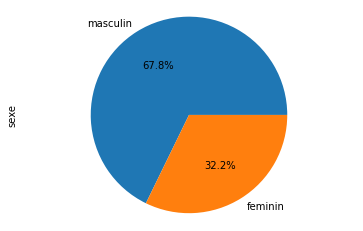

In [67]:
dataset["sexe"].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal')
plt.show() # Affiche le graphique

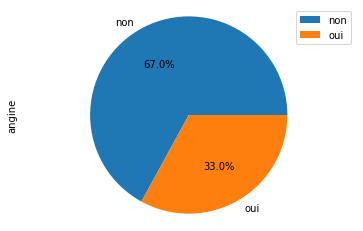

In [66]:
dataset["angine"].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.legend()
plt.show() # Affiche le graphique


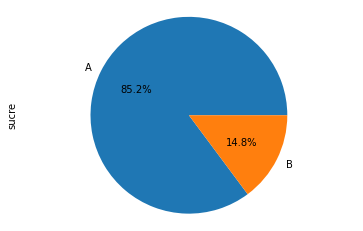

In [65]:
dataset["sucre"].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

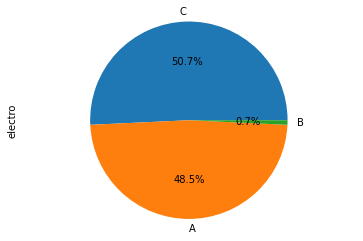

In [64]:
dataset["electro"].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

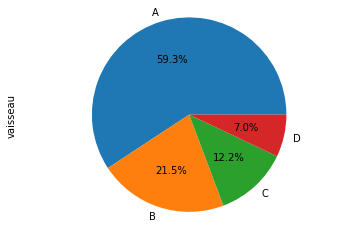

In [63]:
dataset["vaisseau"].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

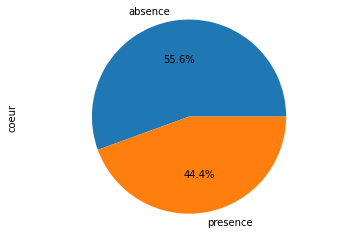

In [62]:
dataset["coeur"].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique


### VARIABLE QUANTITATIVE

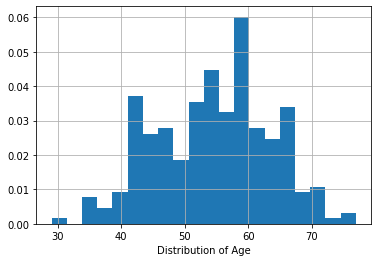

In [45]:
# Histogramme
dataset["age"].hist(density=True,bins=20)
plt.legend
plt.xlabel("Distribution of Age")
plt.show()

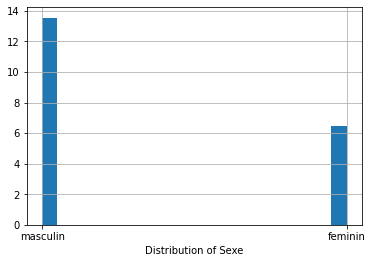

In [47]:
# Histogramme
dataset["sexe"].hist(density=True,bins=20)
plt.legend
plt.xlabel("Distribution of Sexe")
plt.show()

In [48]:
dataset.columns

Index(['age', 'sexe', 'pression', 'cholester', 'sucre', 'electro', 'taux_max',
       'angine', 'depression', 'pic', 'vaisseau', 'coeur'],
      dtype='object')

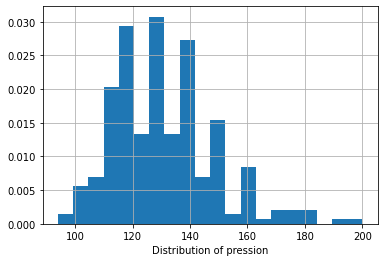

In [49]:
# Histogramme
dataset["pression"].hist(density=True,bins=20)
plt.legend
plt.xlabel("Distribution of pression")
plt.show()

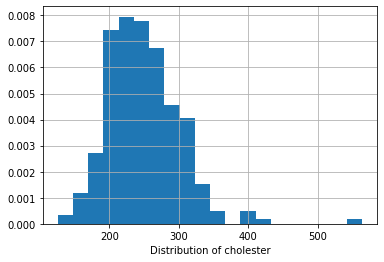

In [50]:
# Histogramme
dataset["cholester"].hist(density=True,bins=20)
plt.legend
plt.xlabel("Distribution of cholester")
plt.show()

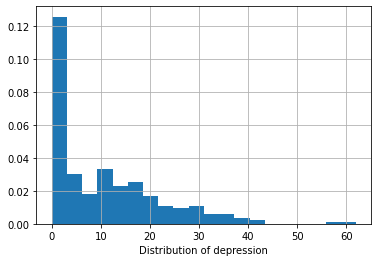

In [51]:
# Histogramme
dataset["depression"].hist(density=True,bins=20)
plt.legend
plt.xlabel("Distribution of depression")
plt.show()

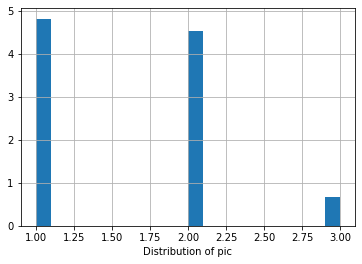

In [52]:
# Histogramme
dataset["pic"].hist(density=True,bins=20)
plt.legend
plt.xlabel("Distribution of pic")
plt.show()

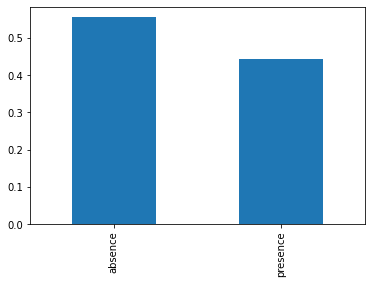

In [59]:
dataset["coeur"].value_counts(normalize=True).plot(kind='bar',width=0.5)
plt.show()

### Variable 2 à 2

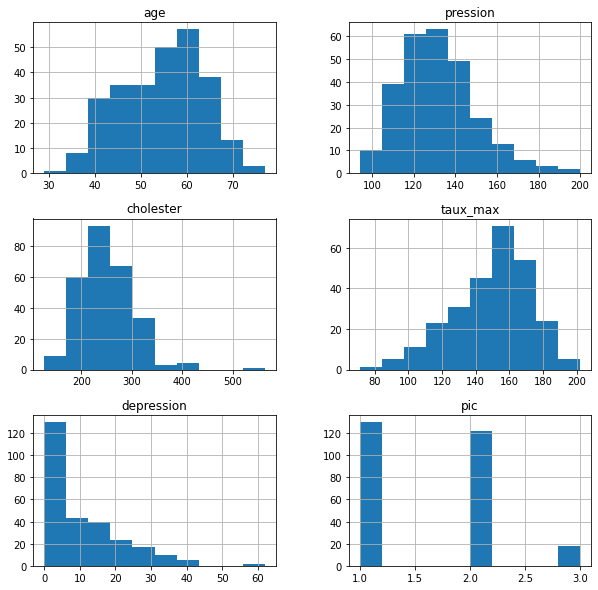

In [61]:
quanti_columns = ['age','pression','cholester','taux_max','depression','pic']
dataset.hist(figsize=(10,10),column = quanti_columns)
plt.show()

## Seabon

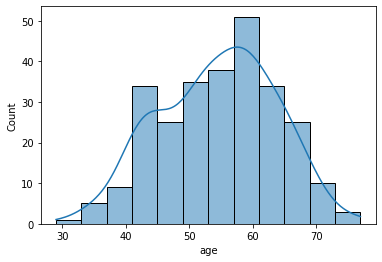

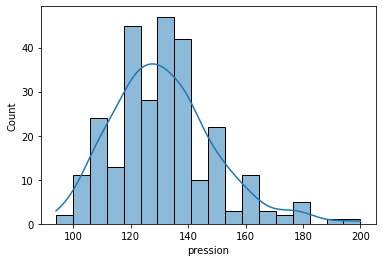

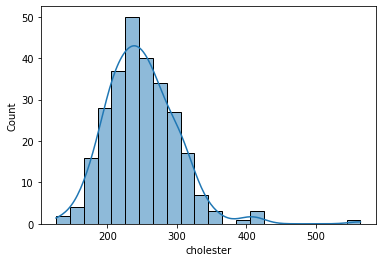

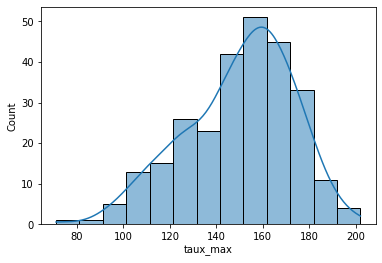

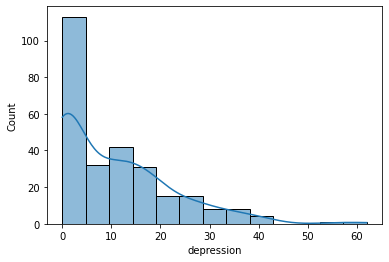

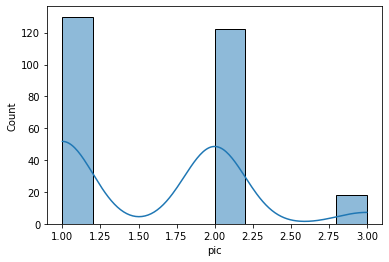

In [90]:
for col in quanti_columns:
    sns.histplot(data = dataset[col], kde=True)
    plt.show()

In [97]:
quali_columns = []
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        quali_columns.append(col)

quali_columns       

['sexe', 'sucre', 'electro', 'angine', 'vaisseau', 'coeur']

In [102]:
quanti_columns = []
for col in dataset.columns:
    if dataset[col].dtype != 'object':
        quanti_columns.append(col)

quanti_columns

['age', 'pression', 'cholester', 'taux_max', 'depression', 'pic']

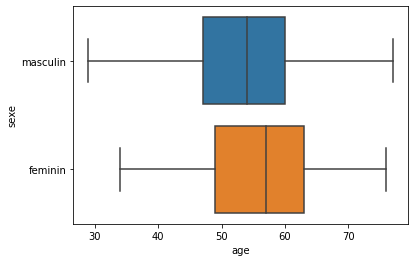

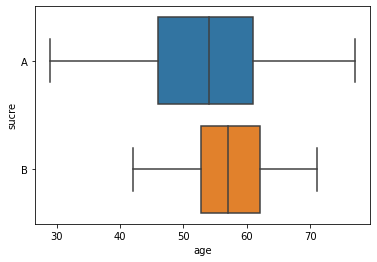

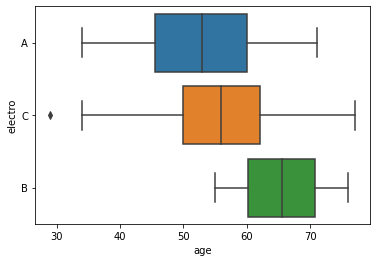

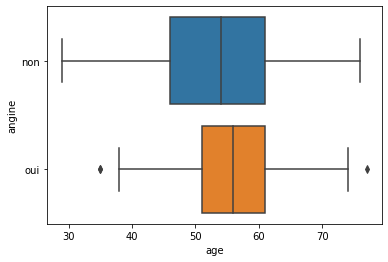

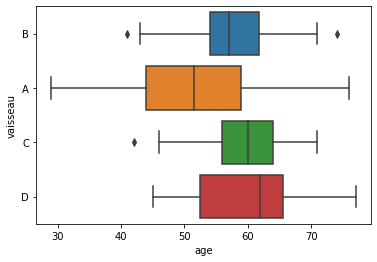

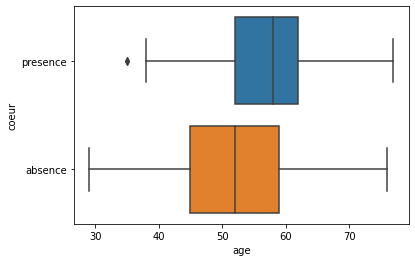

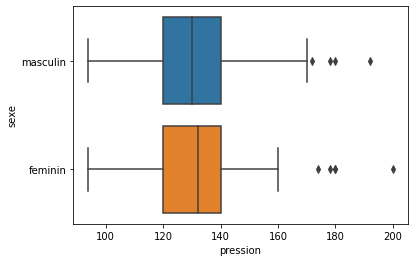

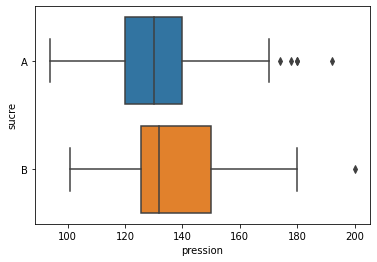

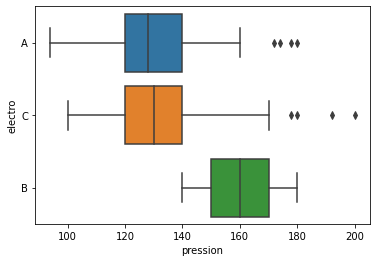

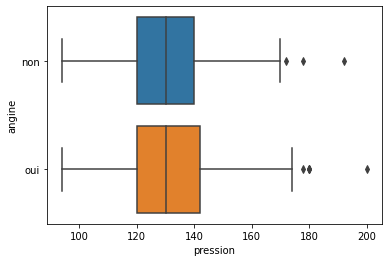

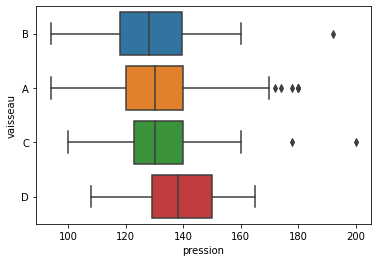

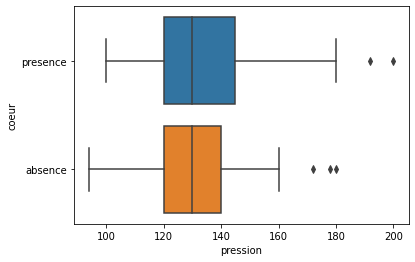

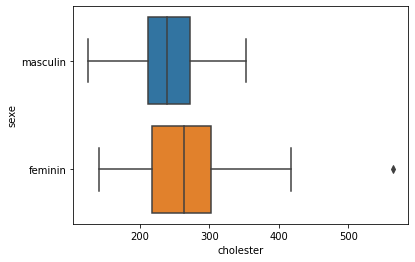

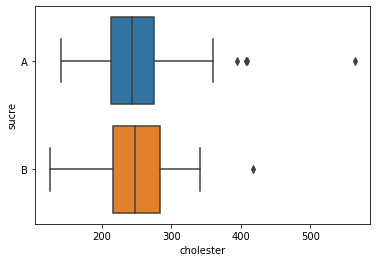

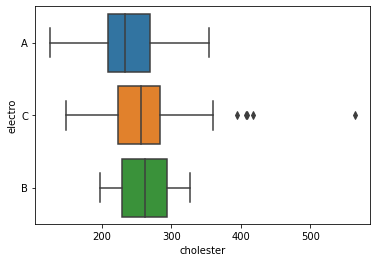

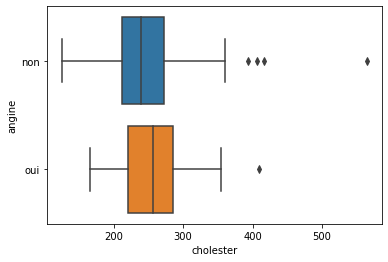

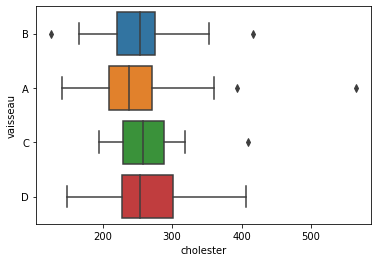

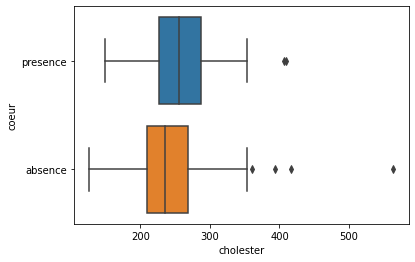

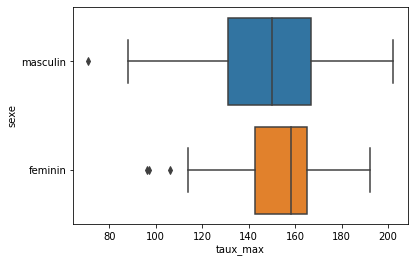

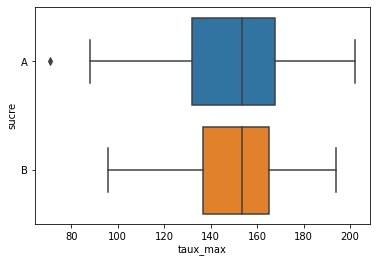

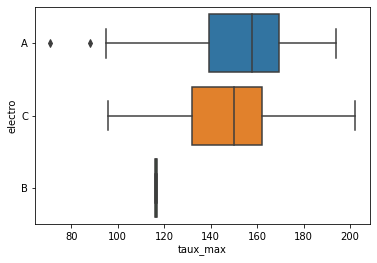

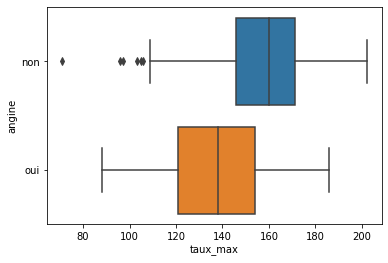

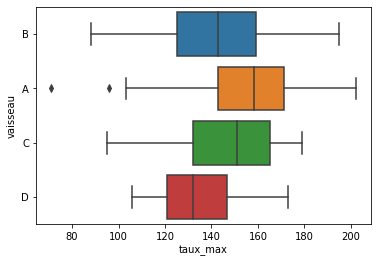

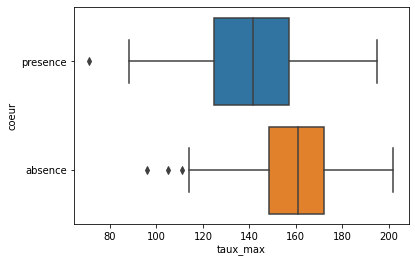

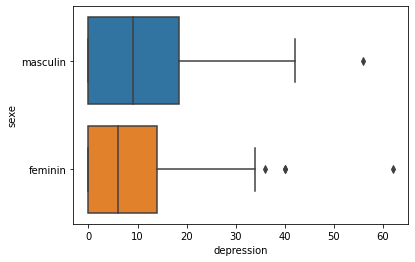

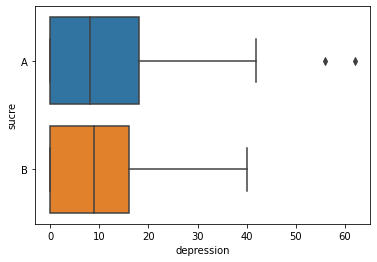

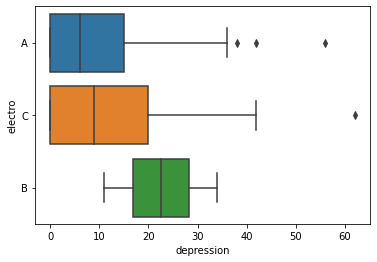

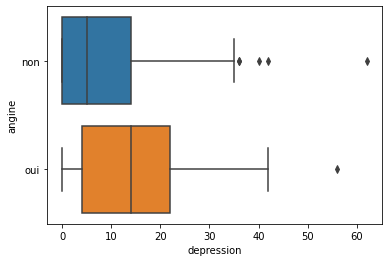

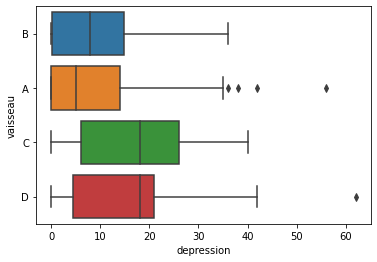

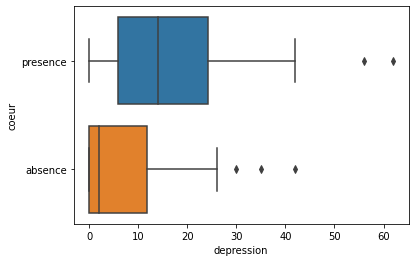

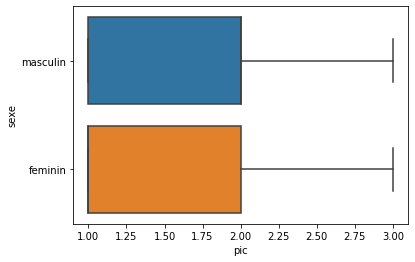

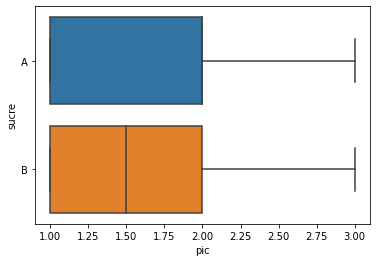

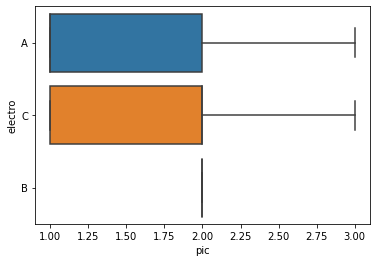

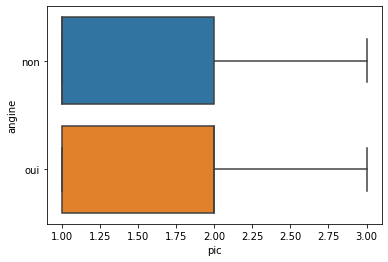

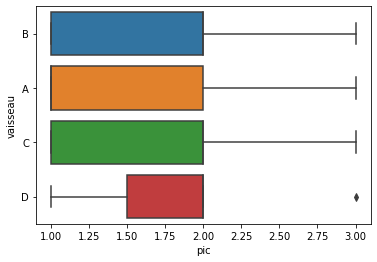

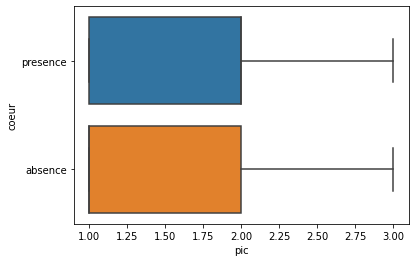

In [104]:
for quant in quanti_columns:
    for quali in quali_columns:
        sns.boxplot(x = dataset[quant], y = dataset[quali])
        plt.show()

## Regression Logistique

In [74]:
X = dataset[['age','pression','cholester','taux_max']].values
#Y = df['taux_max']
y = dataset['coeur']
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)
log = LogisticRegression()
log.fit(X_train,Y_train)
y_predict = log.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

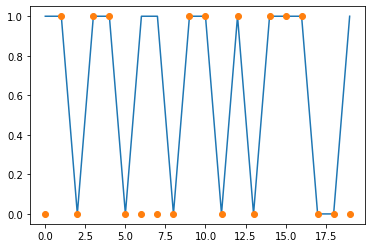

In [75]:
n = 20
plt.plot(Y_test[:n])
plt.plot(y_predict[:n],'o')
plt.show()

In [76]:
s = log.score(X_test,Y_test)
print(f'Le score du model est :{s}')

Le score du model est :0.6851851851851852


In [80]:
model_1 = SGDClassifier()
model_2 = DecisionTreeClassifier()
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = VotingClassifier([('SGD',model_1),('Tree',model_2),('KNN',model_3)],voting='hard')


In [81]:
for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,Y_train)
    print(model.__class__.__name__,model.score(X_test,Y_test))

SGDClassifier 0.6481481481481481
DecisionTreeClassifier 0.48148148148148145
KNeighborsClassifier 0.6666666666666666
VotingClassifier 0.5185185185185185


In [82]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)
model.fit(X_train,Y_train)
model.score(X_test, Y_test)

0.7407407407407407

In [83]:
model = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
model.fit(X_train,Y_train)
model.score(X_test, Y_test)

0.6666666666666666